# Анализ качества работы нейронной сети для распознавания моделей цифр в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
# from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [6]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Список с названиями классов

In [7]:
classes = ['ноль','один', 'два', 'три', 'четыре', 'пять', 'шесть', 'семь', 'восемь', 'девять']

Просматриваем примеры изображений

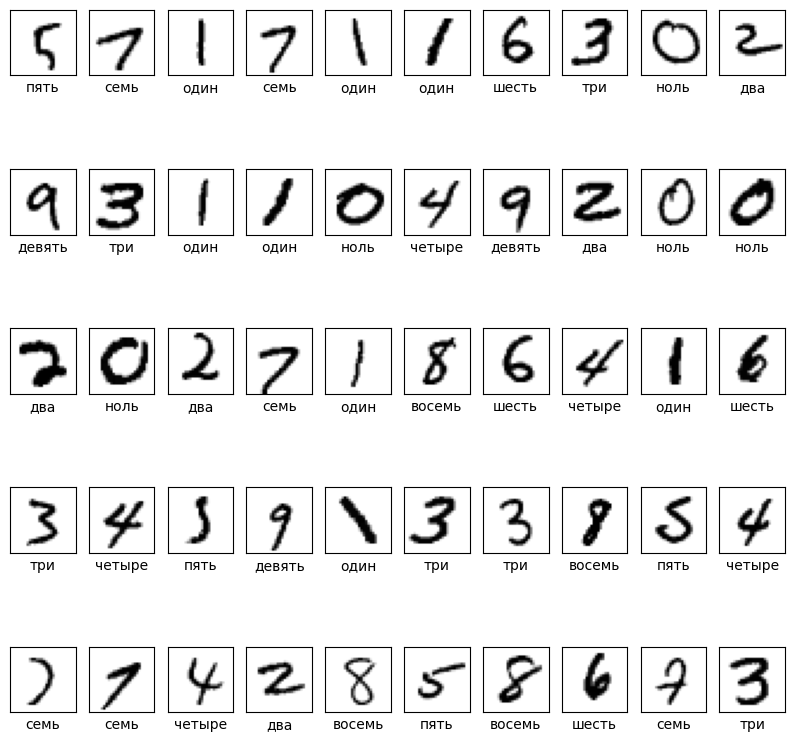

In [8]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [10]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [11]:
n = 0

In [12]:
print(y_train[n])

5


**Преобразуем метки в формат one hot encoding**

In [13]:
y_train = utils.to_categorical(y_train, 10)

In [14]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [15]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [16]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## Обучаем нейронную сеть

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100


240/240 [==============================] - 2s 7ms/step - loss: 1.4283 - accuracy: 0.6694 - val_loss: 0.8723 - val_accuracy: 0.8370
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.7368 - accuracy: 0.8392 - val_loss: 0.5814 - val_accuracy: 0.8682
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.5598 - accuracy: 0.8653 - val_loss: 0.4761 - val_accuracy: 0.8850
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.4806 - accuracy: 0.8788 - val_loss: 0.4220 - val_accuracy: 0.8942
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.4347 - accuracy: 0.8877 - val_loss: 0.3878 - val_accuracy: 0.9004
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.4041 - accuracy: 0.8935 - val_loss: 0.3644 - val_accuracy: 0.9050
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3817 - accuracy: 0.8974 - val_loss: 0.3472 - val_accuracy: 0.9081
Epoch 8/100

## Сохраняем нейронную сеть для последующего использования

In [19]:
model.save('mnist_dense.h5')

c:\Users\Админ\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1325 - accuracy: 0.9614


In [21]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 96.14


## Используем сеть для распознавания предметов одежды

In [40]:
n_rec = 0

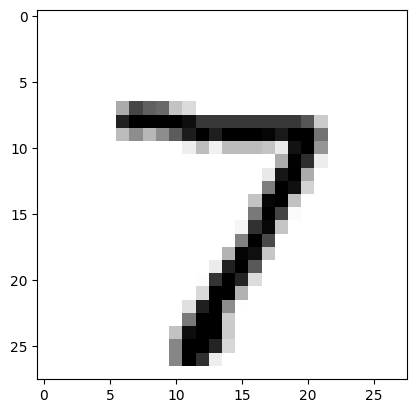

In [41]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [50]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [51]:
prediction = model.predict(x)

1/1 [==============================] - 0s 14ms/step


**Печатаем результаты распознавания**

In [52]:
prediction

array([[3.4544955e-05, 2.0006570e-07, 4.0469057e-04, 3.5513346e-03,
        5.8993891e-07, 6.4529297e-05, 1.2659031e-08, 9.9578565e-01,
        1.5701182e-05, 1.4272623e-04]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [53]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 7
Название класса: семь


**Печатаем правильный ответ**

In [42]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 7
Название класса: семь


## Загружаем свою картинку

In [54]:
files.upload()

NameError: name 'files' is not defined

Проверяем загрузку картинки

In [ ]:
!ls

'$_57.jfif'
 1670522599_10-abrakadabra-fun-p-tsifra-1-estetika-21.png
 cifra-1.jpg
 fashion_mnist_dense.h5
 futbolka-muzhskaia-roly-beagle-chernaia-744497.jpeg
 mnist_dense.h5
 sample_data


Загружаем картинку из файла

In [ ]:
img_path = '1670522599_10-abrakadabra-fun-p-tsifra-1-estetika-21.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

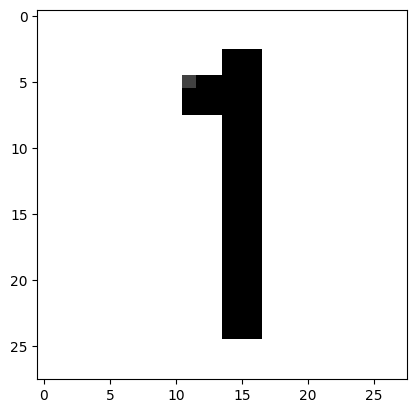

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [ ]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 18ms/step


Результаты распознавания

In [ ]:
prediction

array([[6.9889415e-07, 8.7427217e-01, 1.4910583e-03, 1.0495018e-01,
        1.3896340e-05, 8.4059880e-05, 3.0548604e-06, 1.4940544e-02,
        2.5673027e-03, 1.6769902e-03]], dtype=float32)

In [ ]:
    prediction = np.argmax(prediction)
    print("Номер класса:", prediction)
    print("Название класса:", classes[prediction])

Номер класса: 1
Название класса: один


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.


Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.